In [1]:
%pylab inline 

import numpy as np
import pylab
import seaborn as sns
from scipy.special import betaincinv

Populating the interactive namespace from numpy and matplotlib


In [2]:
import nengo

class AreaIntercepts(nengo.dists.Distribution):
    dimensions = nengo.params.NumberParam('dimensions')
    base = nengo.dists.DistributionParam('base')
    
    def __init__(self, dimensions, base=nengo.dists.Uniform(-1, 1)):
        super(AreaIntercepts, self).__init__()
        self.dimensions = dimensions
        self.base = base
        
    def __repr(self):
        return "AreaIntercepts(dimensions=%r, base=%r)" % (self.dimensions, self.base)
    
    def transform(self, x):
        sign = 1
        if x > 0:
            x = -x
            sign = -1
        return sign * np.sqrt(1-betaincinv((self.dimensions+1)/2.0, 0.5, x+1))
    
    def ppf(self, x):
        s = np.empty_like(x)
        for i in range(len(s)):
            s[i] = self.transform(2 * x[i] - 1)
        return s
    
    def sample(self, n, d=None, rng=np.random):
        s = self.base.sample(n=n, d=d, rng=rng)
        for i in range(len(s)):
            s[i] = self.transform(s[i])
        return s
    


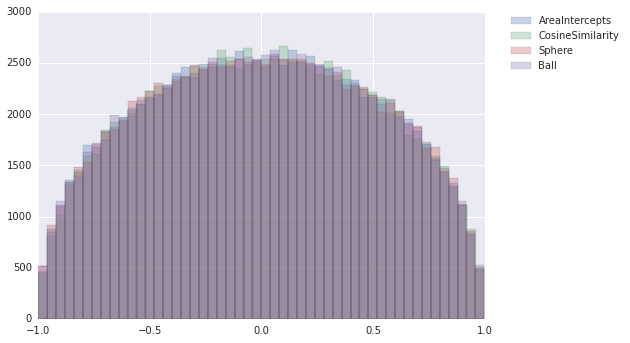

In [20]:
def sample_area_intercepts(dimensions, n, d=None, rng=np.random,
                           base=nengo.dists.Uniform(-1, 1)):
    return nengo.dists.CosineSimilarity(dimensions + 2).ppf(
        (base.sample(n=n, d=d, rng=rng) + 1) / 2)

d = 2
n = 100000

x1 = AreaIntercepts(d).sample(n)
x2 = sample_area_intercepts(d, n)
x3 = nengo.dists.UniformHypersphere(surface=True).sample(n, d + 2)[:, 0]
x4 = nengo.dists.UniformHypersphere(surface=False).sample(n, d)[:, 0]

pylab.figure()
pylab.hist(x1, alpha=0.3, bins=50, label="AreaIntercepts")
pylab.hist(x2, alpha=0.3, bins=50, label="CosineSimilarity")
pylab.hist(x3, alpha=0.3, bins=50, label="Sphere")
pylab.hist(x4, alpha=0.3, bins=50, label="Ball")
pylab.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pylab.show()

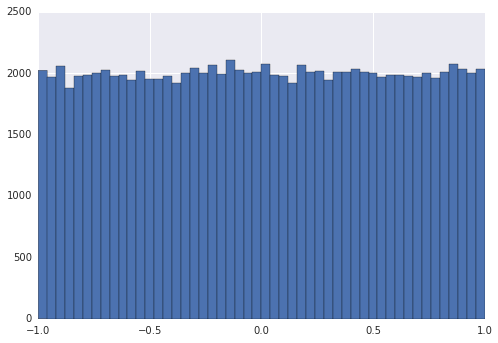

In [4]:
pylab.figure()
#sns.kdeplot(nengo.dists.UniformHypersphere(surface=True).sample(1000, 3)[:, 0])
pylab.hist(nengo.dists.UniformHypersphere(surface=True).sample(100000, 3)[:, 0], bins=50)
pylab.show()


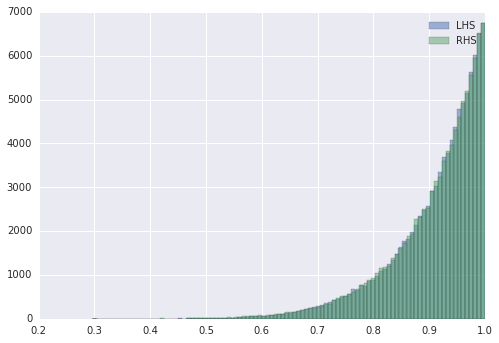

In [19]:
n = 100000
d = 10

g = np.random.randn(n, d + 2)
u = np.random.rand(n)

#y1 = sum(g[:, i]**2 for i in range(d))
#y2 = u**(2.0 / d) * sum(g[:, i]**2 for i in range(d+2))

y1 = np.random.beta(d, 1.0, size=n)
y2 = u ** (1.0 / d)

pylab.figure()
pylab.hist(y1, bins=100, alpha=0.5, label="LHS")
pylab.hist(y2, bins=100, alpha=0.5, label="RHS")
pylab.legend()
pylab.show()

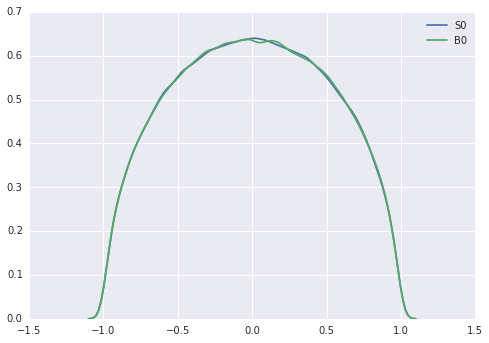

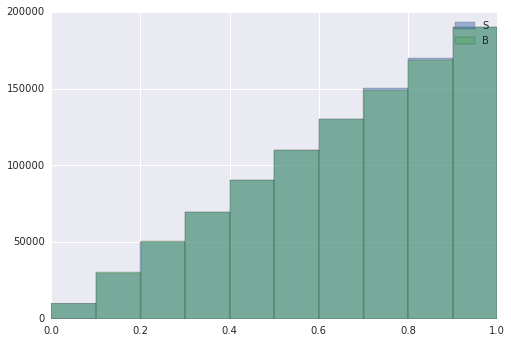

1.00047798337


In [60]:
n = 1000000
d = 2
x1 = nengo.dists.UniformHypersphere(surface=True).sample(n, d+2)[:, :d]
x2 = nengo.dists.UniformHypersphere(surface=False).sample(n, d)

pylab.figure()
sns.kdeplot(x1[:, 0], label="S0")
sns.kdeplot(x2[:, 0], label="B0")
#sns.kdeplot(x1[:, 1], label="S1")
#sns.kdeplot(x2[:, 1], label="B1")
pylab.legend()
pylab.show()

pylab.figure()
pylab.hist(np.linalg.norm(x1, axis=1), alpha=0.5, label="S")
pylab.hist(np.linalg.norm(x2, axis=1), alpha=0.5, label="B")
pylab.legend()
pylab.show()

print (np.linalg.norm(x1, axis=1) > 1).any()
print (np.linalg.norm(x2, axis=1) > 1).any()


In [66]:
n = 5000000
d = 1
x1 = nengo.dists.UniformHypersphere(surface=True).sample(n, d+2)[:, :d]
x2 = nengo.dists.UniformHypersphere(surface=False).sample(n, d)

print (np.linalg.norm(x1, axis=1) > 1).any()
print (np.linalg.norm(x2, axis=1) > 1).any()
print np.mean(np.linalg.norm(x1, axis=1)) / np.mean(np.linalg.norm(x2, axis=1))


False
False
1.00008728544
